TASK1: Collapsed Gibbs Sampler for LDA

In [178]:
import os
import numpy as np
import random

K = 2
N_iters = 500
alpha=float(5)/float(K)
dirichlet_alpha = alpha*np.ones(K)
#print(dirichlet_alpha.shape)
beta = 0.01
dirichlet_beta = beta*np.ones(K)
#print(dirichlet_beta.shape)
parent_dir = '/Users/sahiltyagi/Downloads/pp4data/'

In [179]:
def do_preprocessing(dir_name):
    directory = os.path.join(parent_dir, dir_name)
    listfiles = os.listdir(directory)
    #print(listfiles)
    N_words = 0
    D = (len(listfiles) - 1)
    # unique words 
    V = 0
    word_indices = []
    unique_word_indices = []
    doc_indices = []
    # topic indices
    z_indices = []
    
    for filename in listfiles:
        if filename != 'index.csv':
            #print(filename)
            
            word_count = {}
            
            f = open(directory + '/' + filename, 'r')
            for line in f:
                N_words = N_words + len(line.split())
                for word in line.split():
                    
                    if word not in word_count.keys():
                        word_count[word] = 1
                        
                    elif word in word_count.keys():
                        word_count[word] = word_count[word] + 1
                    
                    if word not in word_indices:
                        V = V + 1
                        unique_word_indices.append(word)
                    
                    word_indices.append(word)
                    doc_indices.append(str(filename))
                    topic = random.randint(0,(K-1))
                    z_indices.append(topic)
                    
            
            f.close()
    
    word_indices = np.array(word_indices)
    doc_indices = np.array(doc_indices)
    z_indices = np.array(z_indices)
    return N_words, word_indices, unique_word_indices, doc_indices, z_indices, V, D

In [180]:
N_words, word_indices, unique_word_indices, doc_indices, z_indices, V, D = do_preprocessing('artificial')
print('number of words ' + str(N_words))
print('number of UNIQUE words ' + str(V))
print(word_indices.shape)
print(doc_indices.shape)
print(z_indices.shape)
#print(z_indices)
#print(z_indices[3,])
#print(doc_indices)

number of words 459
number of UNIQUE words 5
(459,)
(459,)
(459,)


In [181]:
def collapsed_gibbs_sampler(K, N_iters, alpha, beta, dir_name):
    N_words, word_indices, unique_word_indices, doc_indices, z_indices, V, D  = do_preprocessing(
        dir_name)
    
    print('number of words ' + str(N_words))
    print('number of UNIQUE words ' + str(V))
    print('number of documents ' + str(D))

    pi=[i for i in range(0, N_words)]
    pi=np.random.permutation(pi)

    #intitilaize probabilities for the topics to zero
    probability = []
    for i in range(0,K):
        probability.append(0.0)
    
    probability = np.array(probability)
    #print(probability.shape)
    
    C_d = np.zeros((D,K))
    C_t = np.zeros((K,V))
    print('C_d shape ' + str(C_d.shape))
    print('C_t shape ' + str(C_t.shape))
    #print(C_d[0][1])
    
    topics_rep_C_d = np.zeros((D,K))
    
    for i in range(0, N_words):
        #print('doc index ' + str(doc_indices[i,]))
        #print('topic index ' + str(z_indices[i,]))
        C_d[int(doc_indices[i,]) - 1][int(z_indices[i,])] += 1
        C_t[z_indices[i,]][unique_word_indices.index(word_indices[i,])] += 1
        
    #print('C_d matrix ' + str(C_d))
    #print('C_t matrix ' + str(C_t))
    #print('probability vector ' + str(probability))
    
    for i in range(0, N_iters):
        for j in range(0, N_words):
            word = word_indices[pi[j],]
            topic = z_indices[pi[j],]
            doc = doc_indices[pi[j],]
            
            C_d[int(doc) -1][int(topic)] -= 1
            C_t[int(topic), unique_word_indices.index(word)] -= 1
            
            for k in range(0, K):
                
                sum_doc_topics = K*alpha + np.sum(C_d[int(doc) - 1,:])
                #print('sum_doc_topics ' + str(sum_doc_topics))
                #print('numerator ' + str(C_d[int(doc)-1, int(topic)] + alpha))
                #print('term1 ' + str(C_d[int(doc)-1, int(topic)]))
                #print('term2 ' + str(alpha))
                topic_distribution = (C_d[int(doc)-1, int(topic)] + alpha)/sum_doc_topics
                
                topics_rep_C_d[int(doc)-1][int(topic)] = topic_distribution
                
                sum_topic_words = V*beta + np.sum(C_t[int(topic),:])
                word_distribution = (C_t[int(topic), unique_word_indices.index(word)] + beta)/sum_topic_words
                #print('topic dist ' + str(topic_distribution))
                #print('word dist ' + str(word_distribution))
                
                probability[k,] = topic_distribution * word_distribution
                
            #print('##############################')
            #print(probability)
            probability = probability/sum(probability)
            topic = np.random.choice([q for q in range(0, K)], p = probability)
            z_indices[pi[j],] = topic
            C_d[int(doc) -1][int(topic)] += 1
            C_t[int(topic), unique_word_indices.index(word)] += 1
            
    return z_indices, C_d, C_t, unique_word_indices, topics_rep_C_d, V, N_words, doc_indices, word_indices

FOR ARTIFICIAL DATA

In [182]:
K = 2
N_iters = 500
alpha = float(5)/float(K)
dirichlet_alpha = alpha*np.ones(K)
#print(dirichlet_alpha.shape)
beta = float(0.01)
dirichlet_beta = beta*np.ones(K)
#print(dirichlet_beta.shape)

z_indices, C_d, C_t, unique_word_indices, topics_rep_C_d, V, N_words, doc_indices, word_indices = collapsed_gibbs_sampler(
    K, N_iters, alpha, beta, 'artificial')

number of words 459
number of UNIQUE words 5
number of documents 10
C_d shape (10, 2)
C_t shape (2, 5)


In [184]:
artificial_C_d = C_d
artificial_C_t = C_t
artificial_z_indices = z_indices
artificial_topics_rep_C_d = topics_rep_C_d
artificial_unique_word_indices = unique_word_indices
artificial_V = V
artificial_N_words = N_words
artificial_doc_indices = doc_indices
artificial_word_indices = word_indices


print(artificial_C_d)
print(artificial_C_t)
print(artificial_C_d.shape)
print(artificial_C_t.shape)
f = open(parent_dir + 'artificial_topicwords.csv', 'w')
f.write('topic,word,count\n')
for k in range(0, K):
    print('%%%%%%%%%%%%%%% For Topic ' + str(k))
    word_topic_vector = artificial_C_t[k,:]
    for ix in range(0, word_topic_vector.shape[0]):
        print('word ' + str(unique_word_indices[ix]) + ' and count ' + str(word_topic_vector[ix,]))
        f.write(str(k) + ',' + str(unique_word_indices[ix]) + ',' + str(int(word_topic_vector[ix,])) + '\n')
        
f.close()

[[21. 26.]
 [26. 26.]
 [18. 16.]
 [19. 39.]
 [18. 16.]
 [38. 45.]
 [49. 37.]
 [17.  9.]
 [ 1.  2.]
 [18. 18.]]
[[50. 32. 35. 75. 33.]
 [35. 37. 39. 88. 35.]]
(10, 2)
(2, 5)
%%%%%%%%%%%%%%% For Topic 0
word loan and count 50.0
word dollars and count 32.0
word water and count 35.0
word bank and count 75.0
word river and count 33.0
%%%%%%%%%%%%%%% For Topic 1
word loan and count 35.0
word dollars and count 37.0
word water and count 39.0
word bank and count 88.0
word river and count 35.0


FOR 20NEWSGROUPS DATASET

In [125]:
K = 20
N_iters = 500
alpha = float(5)/float(K)
dirichlet_alpha = alpha*np.ones(K)
#print(dirichlet_alpha.shape)
beta = float(0.01)
dirichlet_beta = beta*np.ones(K)
#print(dirichlet_beta.shape)

z_indices, C_d, C_t, unique_word_indices, topics_rep_C_d, V, N_words, doc_indices, word_indices = collapsed_gibbs_sampler(
    K, N_iters, alpha, beta, '20newsgroups')

number of words 8013
number of UNIQUE words 405
number of documents 200
C_d shape (200, 20)
C_t shape (20, 405)


In [126]:
news_C_d = C_d
news_C_t = C_t
news_z_indices = z_indices
news_topics_rep_C_d = topics_rep_C_d
news_unique_word_indices = unique_word_indices
news_v = V
news_N_words = N_words
news_doc_indices = doc_indices
news_word_indices = word_indices

#print(unique_word_indices)

print(news_C_d)
print(news_C_t)
print(news_C_d.shape)
print(news_C_t.shape)
f = open(parent_dir + '20newsgroups_topicwords.csv', 'w')
f.write('topic,word,count\n')
for k in range(0, K):
    print('%%%%%%%%%%%%%%% For Topic ' + str(k))
    word_topic_vector = news_C_t[k,:]
    for ix in range(0, word_topic_vector.shape[0]):
        #print('word ' + str(unique_word_indices[ix]) + ' and count ' + str(word_topic_vector[ix,]))
        f.write(str(k) + ',' + str(news_unique_word_indices[ix]) + ',' + str(int(word_topic_vector[ix,])) + '\n')
        
f.close()

[[0. 0. 1. ... 0. 1. 0.]
 [3. 2. 3. ... 4. 4. 9.]
 [1. 0. 1. ... 0. 2. 0.]
 ...
 [1. 0. 1. ... 1. 0. 0.]
 [2. 4. 3. ... 5. 1. 0.]
 [3. 2. 4. ... 1. 5. 1.]]
[[5. 2. 1. ... 1. 0. 0.]
 [3. 2. 0. ... 0. 0. 2.]
 [5. 2. 0. ... 0. 0. 1.]
 ...
 [8. 1. 1. ... 1. 2. 0.]
 [8. 0. 1. ... 1. 0. 0.]
 [5. 0. 0. ... 0. 1. 1.]]
(200, 20)
(20, 405)
%%%%%%%%%%%%%%% For Topic 0
%%%%%%%%%%%%%%% For Topic 1
%%%%%%%%%%%%%%% For Topic 2
%%%%%%%%%%%%%%% For Topic 3
%%%%%%%%%%%%%%% For Topic 4
%%%%%%%%%%%%%%% For Topic 5
%%%%%%%%%%%%%%% For Topic 6
%%%%%%%%%%%%%%% For Topic 7
%%%%%%%%%%%%%%% For Topic 8
%%%%%%%%%%%%%%% For Topic 9
%%%%%%%%%%%%%%% For Topic 10
%%%%%%%%%%%%%%% For Topic 11
%%%%%%%%%%%%%%% For Topic 12
%%%%%%%%%%%%%%% For Topic 13
%%%%%%%%%%%%%%% For Topic 14
%%%%%%%%%%%%%%% For Topic 15
%%%%%%%%%%%%%%% For Topic 16
%%%%%%%%%%%%%%% For Topic 17
%%%%%%%%%%%%%%% For Topic 18
%%%%%%%%%%%%%%% For Topic 19


TASK 2: CLASSIFICATION

FOR ARTIFICIAL DATASET

In [185]:
def bag_of_words_representation(topics_rep_C_d, V, doc_indices, word_indices, unique_word_indices, N_words):
    
    bag_of_words = np.zeros((topics_rep_C_d.shape[0], V))
    for i in range(0, N_words):
        bag_of_words[int(doc_indices[i,]) - 1][unique_word_indices.index(word_indices[i,])] += 1
        
    #print(bag_of_words)
    #print(np.sum(bag_of_words))
    return bag_of_words
    

In [186]:
artificial_bag_of_words = bag_of_words_representation(artificial_topics_rep_C_d, artificial_V, 
                                                      artificial_doc_indices, artificial_word_indices, 
                                                      artificial_unique_word_indices, artificial_N_words)
# print(artificial_bag_of_words.shape)
# print(artificial_topics_rep_C_d.shape)
print('bag of words ' + str(artificial_bag_of_words))
print('doc topic represent ' + str(artificial_topics_rep_C_d))
np.savetxt(parent_dir + 'artificial_doc_topics.csv', artificial_topics_rep_C_d, delimiter=',')
np.savetxt(parent_dir + 'artificial_bag_of_words.csv', artificial_bag_of_words, delimiter=',')

bag of words [[13. 18.  1. 14.  1.]
 [ 4.  1. 11. 21. 15.]
 [11. 11.  3.  7.  2.]
 [ 3.  5. 20. 17. 13.]
 [13.  7.  0. 11.  3.]
 [ 4.  4. 19. 38. 18.]
 [31. 20.  5. 28.  2.]
 [ 2.  0.  5. 14.  5.]
 [ 1.  2.  0.  0.  0.]
 [ 3.  1. 10. 13.  9.]]
doc topic represent [[0.46078431 0.53921569]
 [0.50892857 0.47321429]
 [0.51315789 0.46052632]
 [0.34677419 0.62096774]
 [0.46052632 0.48684211]
 [0.46551724 0.53448276]
 [0.57222222 0.41666667]
 [0.61666667 0.35      ]
 [0.35714286 0.5       ]
 [0.4875     0.4875    ]]


In [146]:
news_bag_of_words = bag_of_words_representation(news_topics_rep_C_d, news_v, news_doc_indices, news_word_indices, 
                                                news_unique_word_indices, news_N_words)
print(news_bag_of_words.shape)
print(news_topics_rep_C_d.shape)
# print('bag of words ' + str(news_bag_of_words))
# print('doc topic represent ' + str(news_topics_rep_C_d))
np.savetxt(parent_dir + 'news_doc_topics.csv', news_topics_rep_C_d, delimiter=',')
np.savetxt(parent_dir + 'news_bag_of_words.csv', news_bag_of_words, delimiter=',')

(200, 405)
(200, 20)


In [213]:
def adjust_matrix(data_feature):
    new_irls=np.ones((len(data_feature),len(data_feature[0])+1))
    flag=np.fliplr(data_feature)

    for i in range(0,len(flag)):
        for j in range(0,len(flag[i])):
            new_irls[i][j]=flag[i][j]

    new_irls=np.fliplr(new_irls)
    return new_irls

In [235]:
def no_randomness_read_input_file_with_added_feature(feature_file, label_file, dataset, fraction):
    input_feature = np.loadtxt(open(parent_dir + feature_file, "rb"), delimiter=",")
    input_label = np.loadtxt(open(parent_dir + dataset + '/' + label_file, "rb"), delimiter=",")
    
    #getting rid of document document name in input_label as we only need topic number
    input_label = input_label[:,1]
    
    print(input_label.shape)
    print(input_feature.shape)
    
    #added a vector column of 1
#     input_feature = np.append(input_feature, np.ones([len(input_feature),1]), axis=1)
#     print(input_feature.shape)

    input_feature = adjust_matrix(input_feature)
    train_set_size = input_feature.shape[0]
    
    final_trainset_size = int(frac * train_set_size)
    
    input_feature = input_feature[0:final_trainset_size,]
    input_label = input_label[0:final_trainset_size]
    
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print(input_label.shape)
    print(input_feature.shape)
    
    test_set_size = int(input_feature.shape[0]/3)
    train_set_size = int(input_feature.shape[0] - test_set_size)
    ctr = 0
    test_set_indices = []
    
    ix = 0
    while len(test_set_indices) < test_set_size:
        if ix not in test_set_indices:
            test_set_indices.append(ix)
        ix = ix + 1
    #print('len test_set_indices ' + str(len(test_set_indices)))
        
    all_indices = []
    for i in range(0, input_feature.shape[0]):
        all_indices.append(i)
    #print('len all indices ' + str(len(all_indices)))
        
    train_set_indices = []
    for ix in all_indices:
        if ix not in test_set_indices:
            train_set_indices.append(ix)
    #print('len train_set_indices ' + str(len(train_set_indices)))
        
    testset_features = np.take(input_feature, test_set_indices, axis=0)
    testset_label = np.take(input_label, test_set_indices, axis=0)
    print('test set..')
    print(testset_features.shape)
    print(testset_label.shape)
    
    trainset_features = np.take(input_feature, train_set_indices, axis=0)
    trainset_label = np.take(input_label, train_set_indices, axis=0)
    print('train set..')
    print(trainset_features.shape)
    print(trainset_label.shape)
    
    return trainset_features, trainset_label, testset_features, testset_label

In [232]:
def calculate_accuracy_and_error(a, testset_label):
    correct = 0
    total = 0
    for ix in range(0, a.shape[0]):
        if a[ix] >= 0:
            y_pred = 1
        else:
            y_pred = 0
        
        if y_pred == testset_label[ix]:
            correct = correct + 1
        
        total = total + 1
    
    accuracy = float(correct)/float(total)
    error = 1 - accuracy
    print('accuracy is ' + str(accuracy))
    print('error is ' + str(1 - accuracy))
    return accuracy, error

In [229]:
import time
import math
from numpy import exp

def newtons_method(trainset_features, trainset_label, testset_features, testset_label):
    
    w_vector_list = []
    runtime_list = []
    
    w = np.zeros([trainset_features.shape[1],1])
    #print(w.shape)
    alpha = 0.01
    w_n_norm = np.linalg.norm(w)
    stop_criteria = 10.0
    iterations = 0
    trainset_label = trainset_label.reshape((trainset_label.shape[0],1))
    print('trainset shape' + str(trainset_features.shape))
    print('train label shape' + str(trainset_label.shape))
    print('testset shape' + str(testset_features.shape))
    print('test label shape' + str(testset_label.shape))
    
    start_time = time.time()
    while iterations < 500:
        a_list = []
        
        for ix in range(0, trainset_features.shape[0]):
            record = trainset_features[ix,:]
            record = record.reshape([1,trainset_features.shape[1]])
            #print('record shape ' + str(record.shape))
            mew_a = np.matmul(record, w)
            #print('mew_a shape ' + str(mew_a.shape))
            S_n = alpha * np.identity(trainset_features.shape[1])
            #print('S_n shape ' + str(S_n.shape))
            sigma_a2 = np.matmul(record, np.matmul(S_n, np.transpose(record)))
            #print('sigma_a2 shape ' + str(sigma_a2.shape))
            
            a = float(mew_a) / float((math.sqrt(1 + (math.pi*sigma_a2)/8)))
            #print(a)
            
            a_list.append(a)
            
        a_val = np.array(a_list)
        #print(a_val.shape)
        
        
        y_1 = 1 / (1 + exp(-a_val))
        #print('y_1 vector is...')
        #print(y_1)
        #print('y1 shape is ' + str(y_1.shape))
        y_0 = 1 - y_1
        #print('y0 shape is ' + str(y_0.shape))
        
        y_1 = y_1.reshape((y_1.shape[0],1))
        y_0 = y_0.reshape((y_0.shape[0],1))
        
        Rmat = np.matmul(y_1, np.transpose(y_0))
        Rmat = np.diag(Rmat)
        #print('R matrix shape ' + str(Rmat.shape))
        identity_mat = np.identity(Rmat.shape[0])
        Rmat = np.multiply(Rmat, identity_mat)
        #print('R matrix diagonalized shape ' + str(Rmat.shape))
        #print(Rmat)
        
        alpha_I = alpha * np.identity(trainset_features.shape[1])
        #print('alpha_I ' + str(alpha_I.shape))
        Hessian = alpha_I + np.matmul(np.transpose(trainset_features), np.matmul(Rmat, trainset_features))
        Hessian_inverse = np.linalg.inv(Hessian)
        #print('Hessian_inv shape ' + str(Hessian_inverse.shape))
        #print('w shape again ' + str(w.shape))
        g = np.matmul(np.transpose(trainset_features), y_1 - trainset_label) + alpha*w
        #print('g shape is ' + str(g.shape))
        w = w - np.matmul(Hessian_inverse, g)
        #print(w.shape)
        end_time = time.time()
        
        w_vector_list.append(w)
        runtime_list.append(float(end_time - start_time))
        
        w_n_plus_1_norm = np.linalg.norm(w)
        # evaluate stop criterion here...
        
        stop_criteria = abs(w_n_plus_1_norm - w_n_norm)/w_n_norm
        #print('stop criterion threshold value is ' + str(stop_criteria))
        if stop_criteria < 0.001:
            print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............')
            break
        
        w_n_norm = np.linalg.norm(w)
        iterations = iterations + 1
        print('iteration ' + str(iterations))
        
    #print(w)
    # evaluating on the test set now...
    print('w_vector_list length is ' + str(len(w_vector_list)))
    #print(w_vector_list)
    error_across_updates = []
    for w_val in w_vector_list:
        testset_a = []
        for ix in range(0, testset_features.shape[0]):
            record = testset_features[ix,:]
            record = record.reshape([1,testset_features.shape[1]])
            #print('record shape ' + str(record.shape))
            mew_a = np.matmul(record, w_val)
            #print('mew_a shape ' + str(mew_a.shape))
            S_n = alpha * np.identity(testset_features.shape[1])
            #print('S_n shape ' + str(S_n.shape))
            sigma_a2 = np.matmul(record, np.matmul(S_n, np.transpose(record)))
            #print('sigma_a2 shape ' + str(sigma_a2.shape))
            
            a = float(mew_a) / float((math.sqrt(1 + (math.pi*sigma_a2)/8)))
            #print(a)
            testset_a.append(a)
            
        testset_a = np.array(testset_a)
        _, error = calculate_accuracy_and_error(testset_a, testset_label)
        error_across_updates.append(error)
        
    return error_across_updates, runtime_list

In [204]:
trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
    'artificial_doc_topics.csv', 'index.csv', 'artificial', 1.0)
err, runtime = newtons_method(trainset_features, trainset_label, testset_features, testset_label)
print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
#print(acc)
print(err)

(10,)
(10, 2)
test set..
(3, 3)
(3,)
train set..
(7, 3)
(7,)
trainset shape(7, 3)
train label shape(7, 1)
testset shape(3, 3)
test label shape(3,)
iteration 1
iteration 2
iteration 3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 4
accuracy is 1.0
error is 0.0
accuracy is 1.0
error is 0.0
accuracy is 1.0
error is 0.0
accuracy is 1.0
error is 0.0
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
[0.0003399848937988281, 0.0011909008026123047, 0.0015189647674560547, 0.0020461082458496094]


/Users/sahiltyagi/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars


In [205]:
trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
    'artificial_bag_of_words.csv', 'index.csv', 'artificial', 1.0)
err, runtime = newtons_method(trainset_features, trainset_label, testset_features, testset_label)
print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
#print(acc)
print(err)

(10,)
(10, 5)
test set..
(3, 6)
(3,)
train set..
(7, 6)
(7,)
trainset shape(7, 6)
train label shape(7, 1)
testset shape(3, 6)
test label shape(3,)
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 10
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
accuracy is 0.0
error is 1.0
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
[0.0003631114959716797, 0.001157999038696289, 0.0015621185302734375, 0.0021619796752929688, 0.002480030059814453, 0.0028259754180908203, 0.003281116485595703, 0.0035941600799560547, 0.003928184509277344, 0.004256010055541992]


/Users/sahiltyagi/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars


In [196]:
import time
import matplotlib.pyplot as plt

def run_newtons_method(feature_file, label_file, dataset):
    trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
        feature_file, label_file, dataset, 1.0)
    testset_label = testset_label.reshape((testset_label.shape[0],1))
    
    repeats = 3
    for i in range(0, repeats):
        error_across_updates, runtime_list = newtons_method(
            trainset_features, trainset_label, testset_features, testset_label)
        print('error_across_updates length ' + str(len(error_across_updates)))
        print('runtime_list length ' + str(len(runtime_list)))
        
    plt.plot(runtime_list, error_across_updates)
    plt.xlabel('run time (sec)')
    plt.ylabel('Test error')
    plt.title('Dataset ' + dataset)
    plt.show()

In [199]:
#run_newtons_method('artificial_doc_topics.csv', 'index.csv', 'artificial')

In [210]:
trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
    'news_doc_topics.csv', 'index.csv', '20newsgroups', 1.0)
err, runtime = newtons_method(trainset_features, trainset_label, testset_features, testset_label)
print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
#print(acc)
print(np.mean(err))

(200,)
(200, 20)
test set..
(66, 21)
(66,)
train set..
(134, 21)
(134,)
trainset shape(134, 21)
train label shape(134, 1)
testset shape(66, 21)
test label shape(66,)
iteration 1
iteration 2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 3
accuracy is 0.545454545455
error is 0.454545454545
accuracy is 0.545454545455
error is 0.454545454545
accuracy is 0.545454545455
error is 0.454545454545
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
0.4545454545454546


/Users/sahiltyagi/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars


In [211]:
trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
    'news_bag_of_words.csv', 'index.csv', '20newsgroups', 1.0)
err, runtime = newtons_method(trainset_features, trainset_label, testset_features, testset_label)
print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
print(np.mean(err))

(200,)
(200, 405)
test set..
(66, 406)
(66,)
train set..
(134, 406)
(134,)
trainset shape(134, 406)
train label shape(134, 1)
testset shape(66, 406)
test label shape(66,)
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8


/Users/sahiltyagi/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars


iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 15
accuracy is 0.818181818182
error is 0.181818181818
accuracy is 0.818181818182
error is 0.181818181818
accuracy is 0.833333333333
error is 0.166666666667
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.893939393939
error is 0.106060606061
accuracy is 0.893939393939
error is 0.106060606061
accuracy is 0.893939393939
error is 0.106060606061
accuracy is 0.893939393939
error is 0.106060606061
accuracy is 0.909090909091
error is 0.0909090909091
accuracy is 0.969696969697
error is 0.030303030303
accuracy is 0.969696969697
error is 0.030303030303
accuracy is 0.969696969697
error is 0.030303030303
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [239]:
fractions = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
doc_topics_err_list = []
for frac in fractions:
    trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
        'news_doc_topics.csv', 'index.csv', '20newsgroups', frac)
    err, runtime = newtons_method(trainset_features, trainset_label, testset_features, testset_label)
    print(np.max(err))
    doc_topics_err_list.append(np.max(err))

    print(doc_topics_err_list)

(200,)
(200, 20)
^^^^^^^^^^^^^^^^^^^^^^^^^^
(20,)
(20, 21)
test set..
(6, 21)
(6,)
train set..
(14, 21)
(14,)
trainset shape(14, 21)
train label shape(14, 1)
testset shape(6, 21)
test label shape(6,)
iteration 1
iteration 2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 3
accuracy is 0.5
error is 0.5
accuracy is 0.5
error is 0.5
accuracy is 0.5
error is 0.5
0.5
[0.5]
(200,)
(200, 20)
^^^^^^^^^^^^^^^^^^^^^^^^^^
(40,)
(40, 21)
test set..
(13, 21)
(13,)
train set..
(27, 21)
(27,)
trainset shape(27, 21)
train label shape(27, 1)
testset shape(13, 21)
test label shape(13,)
iteration 1
iteration 2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 3
accuracy is 0.384615384615
error is 0.615384615385
accuracy is 0.384615384615
error is 0.615384615385
accuracy is 0.384615384615
error is 0.615384615385
0.6153846153846154
[0.5, 0.6153846153846154]
(200,)
(200, 20)
^^^^^^

/Users/sahiltyagi/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 3
accuracy is 0.516666666667
error is 0.483333333333
accuracy is 0.516666666667
error is 0.483333333333
accuracy is 0.516666666667
error is 0.483333333333
0.4833333333333333
[0.5, 0.6153846153846154, 0.35, 0.46153846153846156, 0.5151515151515151, 0.6, 0.6086956521739131, 0.5660377358490566, 0.4833333333333333]
(200,)
(200, 20)
^^^^^^^^^^^^^^^^^^^^^^^^^^
(200,)
(200, 21)
test set..
(66, 21)
(66,)
train set..
(134, 21)
(134,)
trainset shape(134, 21)
train label shape(134, 1)
testset shape(66, 21)
test label shape(66,)
iteration 1
iteration 2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 3
accuracy is 0.545454545455
error is 0.454545454545
accuracy is 0.545454545455
error is 0.454545454545
accuracy is 0.545454545455
error is 0.454545454545
0.4545454545454546
[0.5, 0.6153846153846154, 0.35, 0.46153846153846156, 

In [240]:
fractions = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
bag_of_words_err_list = []
for frac in fractions:
    trainset_features, trainset_label, testset_features, testset_label = no_randomness_read_input_file_with_added_feature(
        'news_bag_of_words.csv', 'index.csv', '20newsgroups', frac)
    err, runtime = newtons_method(trainset_features, trainset_label, testset_features, testset_label)
    print(np.max(err))
    bag_of_words_err_list.append(np.max(err))

    print(bag_of_words_err_list)

(200,)
(200, 405)
^^^^^^^^^^^^^^^^^^^^^^^^^^
(20,)
(20, 406)
test set..
(6, 406)
(6,)
train set..
(14, 406)
(14,)
trainset shape(14, 406)
train label shape(14, 1)
testset shape(6, 406)
test label shape(6,)
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 11
accuracy is 0.666666666667
error is 0.333333333333
accuracy is 0.666666666667
error is 0.333333333333
accuracy is 0.666666666667
error is 0.333333333333
accuracy is 0.666666666667
error is 0.333333333333
accuracy is 0.666666666667
error is 0.333333333333
accuracy is 0.666666666667
error is 0.333333333333
accuracy is 0.833333333333
error is 0.166666666667
accuracy is 0.833333333333
error is 0.166666666667
accuracy is 0.833333333333
error is 0.166666666667
accuracy is 0.833333333333
error is 0.166666666667
accuracy is 0.833333333333
error is 0.166666666

/Users/sahiltyagi/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in double_scalars



(40,)
(40, 406)
test set..
(13, 406)
(13,)
train set..
(27, 406)
(27,)
trainset shape(27, 406)
train label shape(27, 1)
testset shape(13, 406)
test label shape(13,)
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 12
accuracy is 0.769230769231
error is 0.230769230769
accuracy is 0.769230769231
error is 0.230769230769
accuracy is 0.769230769231
error is 0.230769230769
accuracy is 0.769230769231
error is 0.230769230769
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846154
error is 0.153846153846
accuracy is 0.846153846

(200,)
(200, 405)
^^^^^^^^^^^^^^^^^^^^^^^^^^
(200,)
(200, 406)
test set..
(66, 406)
(66,)
train set..
(134, 406)
(134,)
trainset shape(134, 406)
train label shape(134, 1)
testset shape(66, 406)
test label shape(66,)
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! reached threshold...............
w_vector_list length is 15
accuracy is 0.818181818182
error is 0.181818181818
accuracy is 0.818181818182
error is 0.181818181818
accuracy is 0.833333333333
error is 0.166666666667
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.863636363636
error is 0.136363636364
accuracy is 0.893939393939
error is 0.106060606061
accuracy is 0.893939393939
error is 0.106060606061
accuracy is 0.893939393939
error is 

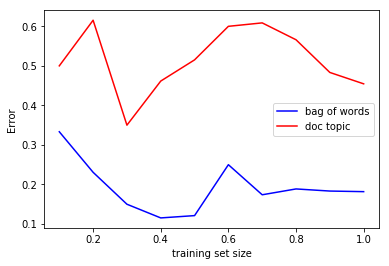

In [243]:
import matplotlib.pyplot as plt

fractions = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

plt.plot(fractions, bag_of_words_err_list, color='b', label='bag of words')
plt.plot(fractions, doc_topics_err_list, color='r', label = 'doc topic')

plt.ylabel('Error')
plt.xlabel('training set size')
plt.legend(loc='best')

plt.show()

In [1]:
b_big = 384
b_small = 128
g_big = 1.107932387778861
g_small = 1.5336734447328282

inv_big = float(1)/float(b_big)
inv_small = float(1)/float(b_small)

G = (b_big*g_big - b_small*g_small)/(b_big - b_small)
S = (g_small - g_big)/(inv_small - inv_big)

Noise = float(S)/float(G)
print(Noise)


91.3258475776
